In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
import numpy as np

# Input vector (3 inputs)
x1, x2, x3 = 3, 4, 2
X = np.array([[x1], [x2], [x3]])

# Weight matrix (4 neurons, 3 inputs each)
W = np.array([
    [0.2, 0.3, 0.3],
    [0.5, 0.2, 0.5],
    [0.1, 0.2, 0.1],
    [0.5, 0.4, 0.2]
])

# Bias vector (4 biases)
B = np.array([[2], [2.1], [0.3], [0.1]])

# Compute Z = W * X + B
Z = np.dot(W, X) + B

# Apply activation function (e.g., sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

A = sigmoid(Z)

print("Z (Linear Output):")
print(Z)
print("\nA (Activated Output):")
print(A)


Z (Linear Output):
[[4.4]
 [5.4]
 [1.6]
 [3.6]]

A (Activated Output):
[[0.98787157]
 [0.99550373]
 [0.83201839]
 [0.97340301]]


## Forward and Back propagation

In [23]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))
def derivatives_sigmoid(z):
    return sigmoid(z) * (1-sigmoid(z))

x=0.5
y = 0.8
w1 = 0.4
b1 = 0.1
w2 = 0.3
b2 = 0.2
learning_rate = 0.1
z1 = w1 * x +b1
a1 = sigmoid(z1)
z2 = w2 * a1 +b2 
a = sigmoid(z2)
loss = 0.5 * (y - a) ** 2
print(f"Initial Loss: {loss}")
## Derivativess for output layer
dL_da =a - y
da_dz2 = derivatives_sigmoid(z2)
#The chain rule for the loss gradient with respect to 𝑧2:
dL_dz2 = dL_da * da_dz2
#Gradients for w2 and b2
dz2_dw2 = a1
dz2_db2 = 1
#Loss function for W2 and b2
dL_dw2 = dL_dz2 * dz2_dw2
dL_db2 = dL_dz2 * dz2_db2
## Back propagation in hidden layer z2 with respect to a1
dz2_da1 = w2
## Loss w.r.t a1:
dL_da1 = dL_dz2 * dz2_da1
# Derivaives of a1 w.r.t z1 :
da1_dz1 = derivatives_sigmoid(z1)
# Loss graident w.r.t z1 
dL_dz1 = dL_da1 * da1_dz1
# Gradient for W1 and b1 
# Derivvatives of z1 w.r.t w1
dz1_dw1 = x
# Derivvatives of z1 w.r.t b1
dz1_db1= 1
#NOw
dL_dw1 = dL_dz1 * dz1_dw1
dL_db1 = dL_dz1 * dz1_db1
# Updating weights and biases

W2 -= learning_rate * dL_dW2
b2 -= learning_rate * dL_db2
W1 -= learning_rate * dL_dW1
b1 -= learning_rate * dL_db1

# Print updated weights and biases
print(f"Updated W1: {W1}, Updated b1: {b1}")
print(f"Updated W2: {W2}, Updated b2: {b2}")

# Forward propagation with updated weights and biases
z1 = W1 * x + b1
a1 = sigmoid(z1)
z2 = W2 * a1 + b2
a = sigmoid(z2)

# New Loss
loss = 0.5 * (y - a) **

print(f"New Loss: {loss}")


Initial Loss: 0.021627313223007625
Updated W1: 0.40018419878605427, Updated b1: 0.1003683975721085
Updated W2: 0.3028856075983625, Updated b2: 0.2050233182849671
New Loss: 0.021291519138776156


## Example with dataset

In [26]:
import numpy as np

# Create a random dataset with 100 samples and 3 features
np.random.seed(42)
X = np.random.rand(100, 3)  # 100 samples, 3 features
y = (np.sum(X, axis=1) > 1.5).astype(int).reshape(-1, 1)  # Binary output based on a simple rule


In [28]:
def initialize_parameters():
    W1 = np.random.randn(3, 5) * 0.01  # 3 inputs, 5 neurons in the first hidden layer
    b1 = np.zeros((1, 5))
    W2 = np.random.randn(5, 3) * 0.01  # 5 neurons in the first layer, 3 in the second
    b2 = np.zeros((1, 3))
    W3 = np.random.randn(3, 1) * 0.01  # 3 neurons in the second layer, 1 output neuron
    b3 = np.zeros((1, 1))
    
    return W1, b1, W2, b2, W3, b3


In [30]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_propagation(X, W1, b1, W2, b2, W3, b3):
    # Layer 1
    Z1 = np.dot(X, W1) + b1
    A1 = np.tanh(Z1)
    
    # Layer 2
    Z2 = np.dot(A1, W2) + b2
    A2 = np.tanh(Z2)
    
    # Output layer
    Z3 = np.dot(A2, W3) + b3
    A3 = sigmoid(Z3)
    
    return A1, A2, A3, Z1, Z2, Z3


In [32]:
def backward_propagation(X, y, A1, A2, A3, Z1, Z2, Z3, W2, W3):
    m = X.shape[0]
    
    # Output layer gradients
    dZ3 = A3 - y
    dW3 = np.dot(A2.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m
    
    # Layer 2 gradients
    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * (1 - np.tanh(Z2) ** 2)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    
    # Layer 1 gradients
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (1 - np.tanh(Z1) ** 2)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    return dW1, db1, dW2, db2, dW3, db3


In [34]:
def update_parameters(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
    
    return W1, b1, W2, b2, W3, b3


In [36]:
def train_neural_network(X, y, epochs=1000, learning_rate=0.01):
    W1, b1, W2, b2, W3, b3 = initialize_parameters()
    
    for i in range(epochs):
        # Forward propagation
        A1, A2, A3, Z1, Z2, Z3 = forward_propagation(X, W1, b1, W2, b2, W3, b3)
        
        # Compute loss (binary cross-entropy)
        loss = -np.mean(y * np.log(A3) + (1 - y) * np.log(1 - A3))
        
        # Backward propagation
        dW1, db1, dW2, db2, dW3, db3 = backward_propagation(X, y, A1, A2, A3, Z1, Z2, Z3, W2, W3)
        
        # Update parameters
        W1, b1, W2, b2, W3, b3 = update_parameters(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, learning_rate)
        
        if i % 100 == 0:
            print(f'Epoch {i}, Loss: {loss}')
    
    return W1, b1, W2, b2, W3, b3

# Train the model
W1, b1, W2, b2, W3, b3 = train_neural_network(X, y)


Epoch 0, Loss: 0.6931471991529193
Epoch 100, Loss: 0.6918857148160269
Epoch 200, Loss: 0.691121380539085
Epoch 300, Loss: 0.6906581176687557
Epoch 400, Loss: 0.6903772234549146
Epoch 500, Loss: 0.6902068393528137
Epoch 600, Loss: 0.690103450517812
Epoch 700, Loss: 0.6900406937498762
Epoch 800, Loss: 0.6900025892500125
Epoch 900, Loss: 0.6899794465757547


## Binary Classification Problem


In [334]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Generate synthetic binary classification data
X = np.random.rand(1000, 3)  # 1000 samples, 3 features
y = np.random.randint(0, 2, size=(1000, 1))  # Binary labels (0 or 1)

# Define the model
model = Sequential([
    Dense(10, input_dim=3, activation='relu'),
    Dense(11, input_dim=3, activation='relu'),
    Dense(21, input_dim=3, activation='relu'),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5213 - loss: 0.6944
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5105 - loss: 0.6948
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5149 - loss: 0.6928
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5008 - loss: 0.6932
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5153 - loss: 0.6925
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5155 - loss: 0.6924
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4933 - loss: 0.6929
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5189 - loss: 0.6926
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5184 - loss: 0.6928
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5227 - loss: 0.6915


In [350]:
X = np.random.rand(1000, 3)
X
model.predict(np.array([[0.22840419, 0.80164709, 0.99798432]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[0.49125126]], dtype=float32)

In [352]:
y[2]

array([0])

# MNIST Data Set

In [23]:
##Done in Google Colab

# Breast Cancer Dataset

In [25]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Binary target (0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(10, input_dim=X_train.shape[1], activation='relu'),
    Dense(11, activation='relu'),
    Dense(21, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

C:\Users\PMLS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8299 - loss: 0.5461 - val_accuracy: 0.9561 - val_loss: 0.4233
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9033 - loss: 0.4229 - val_accuracy: 0.9561 - val_loss: 0.3120
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9303 - loss: 0.3180 - val_accuracy: 0.9474 - val_loss: 0.2263
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9443 - loss: 0.2284 - val_accuracy: 0.9561 - val_loss: 0.1693
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9273 - loss: 0.1947 - val_accuracy: 0.9561 - val_loss: 0.1357
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9410 - loss: 0.1558 - val_accuracy: 0.9649 - val_loss: 0.1159
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9502 - loss: 0.1357 - val_accuracy: 0.9649 - val_loss: 0.1019
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9434 - loss: 0.1285 - val_accuracy: 0.9649 - v

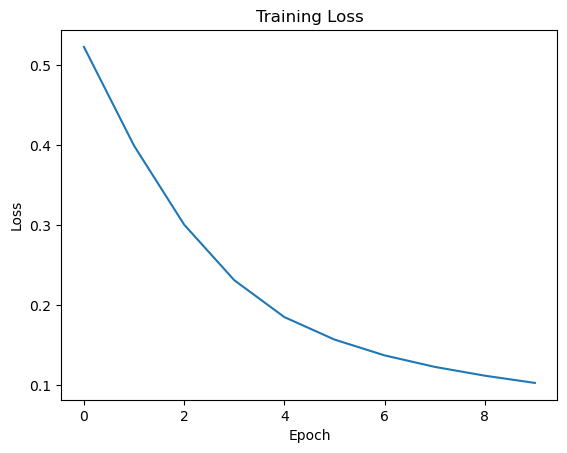

In [35]:
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

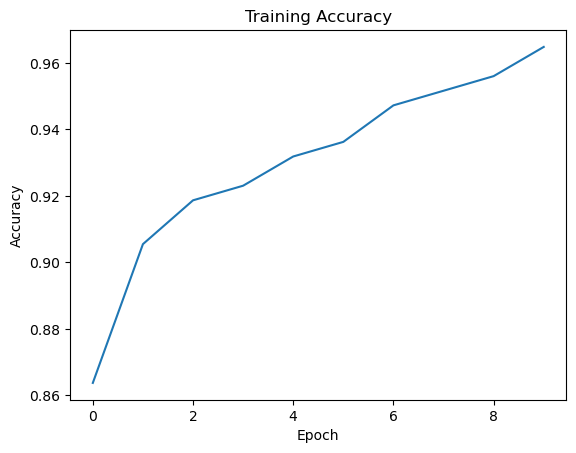

In [39]:
plt.plot(history.history["accuracy"])
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

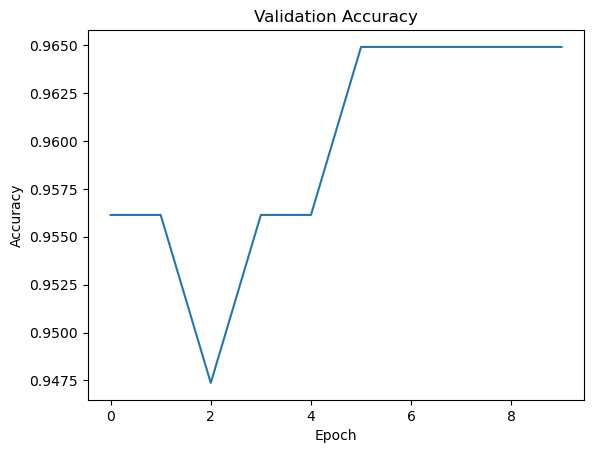

In [41]:
plt.plot(history.history["val_accuracy"])
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [433]:
model.predict([X_test[:1]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


array([[3.7852249e-13, 3.0254236e-13, 1.0372649e-10, 2.9917038e-10,
        2.0092645e-16, 9.5765420e-13, 1.1550312e-14, 1.0000000e+00,
        1.4552157e-12, 2.1493316e-09]], dtype=float32)

In [435]:
y_test[:1]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

## Multiclass Classification Using CNN and ANN 

In [51]:
import numpy as np
import os
import cv2 as cv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define paths
dataset_path = r'D:\Classification DataSet\ImageClassification'  # Replace with the path to your dataset

# Load and preprocess the dataset
def load_and_preprocess_image(image_path):
    image = cv.imread(image_path)
    image = cv.resize(image, (64, 64))  # Resize image to 64x64
    image = image / 255.0  # Normalize pixel values
    return image

def load_dataset(dataset_path):
    images = []
    labels = []
    classes = ['Cars', 'Cricket ball', 'Ice cream cone']
    for label, class_name in enumerate(classes):
        class_path = os.path.join(dataset_path, class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            if os.path.isfile(image_path):  # Check if the path is a file
                image = load_and_preprocess_image(image_path)
                images.append(image)
                labels.append(label)
    return np.array(images), np.array(labels)

images, labels = load_dataset(dataset_path)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# To make predictions on new data
def predict_class(image_path):
    image = load_and_preprocess_image(image_path)
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class



Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.5344 - loss: 1.0124 - val_accuracy: 0.8485 - val_loss: 0.3339
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9119 - loss: 0.2437 - val_accuracy: 0.9444 - val_loss: 0.1457
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9453 - loss: 0.1495 - val_accuracy: 0.9697 - val_loss: 0.0949
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9829 - loss: 0.0623 - val_accuracy: 0.9646 - val_loss: 0.0844
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9891 - loss: 0.0444 - val_accuracy: 0.9949 - val_loss: 0.0428
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9979 - loss: 0.0272 - val_accuracy: 0.9949 - val_loss: 0.0405
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9969 - loss: 0.0149 - val_accuracy: 0.9899 - val_loss: 0.0297
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9977 - loss: 0.0125 - val_accuracy: 0.9899 - v

In [53]:
image_path = r"C:\Users\PMLS\Desktop\images.jfif"
print("Predicted Class:",predict_class(image_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Predicted Class: [1]


In [57]:
# Assuming X_test is a numpy array containing image data
first_two_images = X_test[0:10]

In [59]:
np.argmax(model.predict(first_two_images), -1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


array([0, 0, 1, 2, 0, 1, 2, 0, 0, 1], dtype=int64)

In [67]:
y_test[0:10].argmax(axis = 1)

array([0, 0, 1, 2, 0, 1, 2, 0, 0, 1], dtype=int64)

In [65]:
model.predict(first_two_images).argmax(axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([0, 0, 1, 2, 0, 1, 2, 0, 0, 1], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score


Text(0, 0.5, 'Loss')

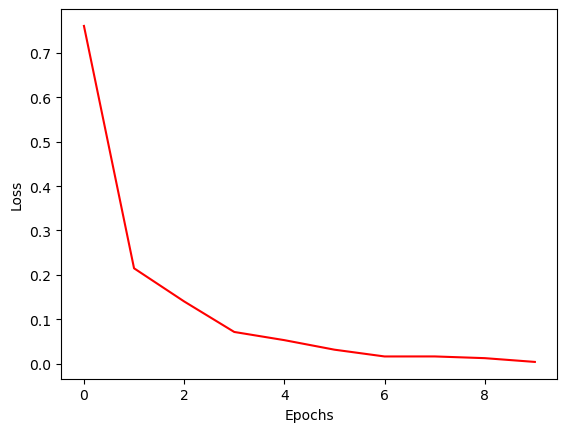

In [89]:
plt.plot(history.history['loss'] , c = 'r')
plt.xlabel("Epochs")
plt.ylabel("Loss")


Text(0, 0.5, 'Accuracy')

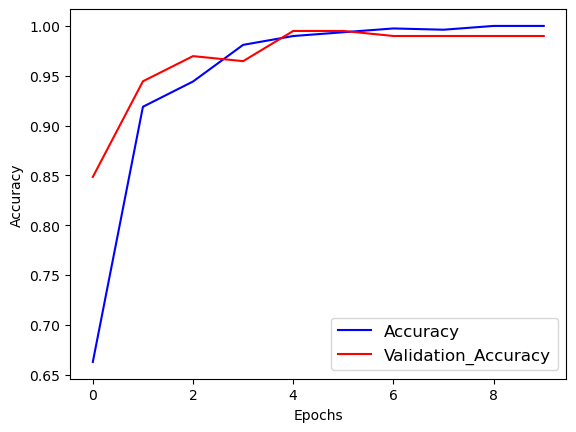

In [91]:
plt.plot(history.history['accuracy'] , c = 'b' , label = 'Accuracy')
plt.plot(history.history['val_accuracy'] , c = 'r' , label = 'Validation_Accuracy')
plt.legend(fontsize = 'large')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [93]:
x=np.array([[[1],[2]],[[3],[4]]])

x.shape

(2, 2, 1)

In [112]:
x = np.random.rand(3, 2)

y = np.sum(x, axis=0, keepdims=True)

In [114]:
y.shape

(1, 2)

In [116]:
x

array([[0.51923464, 0.17910839],
       [0.83673221, 0.57496836],
       [0.52737398, 0.56615548]])